# Hands-on Lab --- Calculating and Analyzing CLV

## Importing standard packages:

In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

## Reading in the original data, and joining with the churn and margin predicted values:

In [3]:
combined_df = pd.read_csv('C:\\Business Analytics\\3rd Sem\\CLV\\Team Project\\Team Project\\combined_data.csv')
churn_df = pd.read_csv('C:\\Business Analytics\\3rd Sem\\CLV\\Team Project\\Team Project\\churn_scores.csv')
margin_df = pd.read_csv('C:\\Business Analytics\\3rd Sem\\CLV\\Team Project\\Team Project\\margin_scores.csv')

combined_df = pd.merge(combined_df, churn_df, on='acct_ID', how='left')
combined_df = pd.merge(combined_df, margin_df, on='acct_ID', how='left')

# it should be noted that Python is case sensitive for variable names.  acct_id above would fail.

combined_df.shape

(311163, 128)

## Since our margin model had transformed the target variable, we need to untransform the predicted value,
##     using the inverse of our transformation:

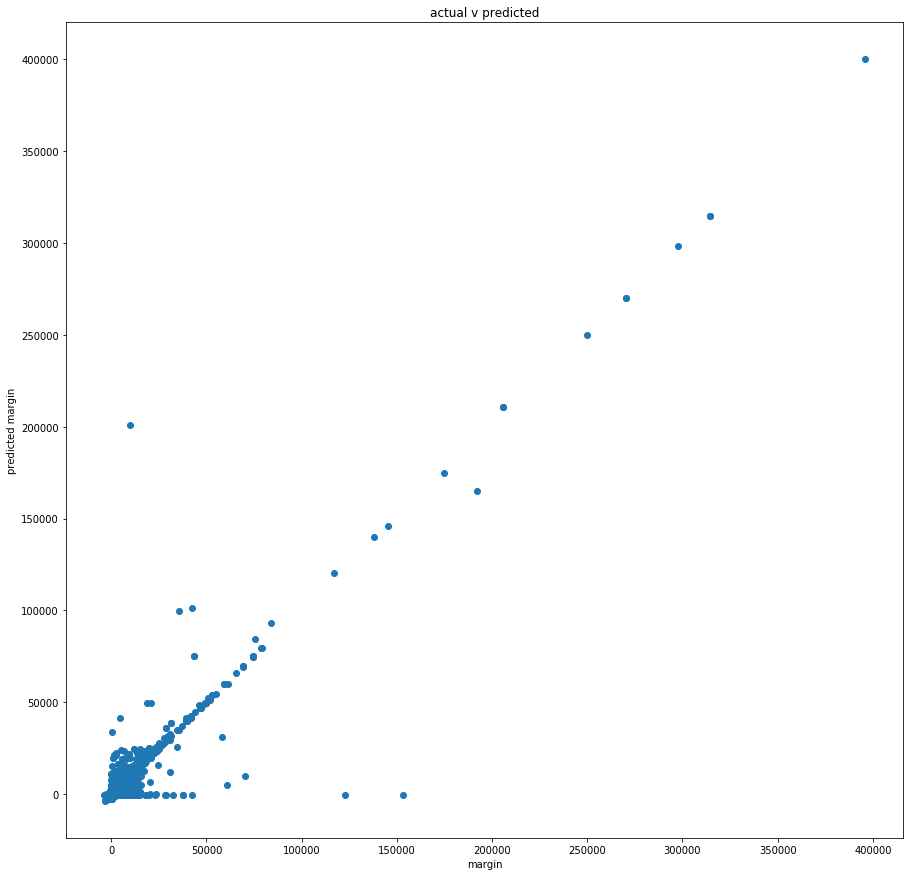

In [4]:
combined_df['P_margin_Y_pos_1']=10**combined_df['P_log_margin_Y_pos_1']-50000

# Plotting predicted untransformed values vs actual untransformed values:

plt.figure(figsize=(15,15))
plt.scatter(combined_df['P_margin_Y_pos_1'], combined_df['margin_Y_pos_1'])
plt.xlabel("margin")
plt.ylabel("predicted margin")
plt.title("actual v predicted")
# plt.xticks([])
# plt.yticks([])
print(" ") 
plt.show()

# It should be noted:  we are scoring our original data, used for modeling, only for the purposes of analysis.
##  In a "real world" situation, we would most likely be scoring a full population for which we did not actually
##  know the future churn or the future margin.

## We are using a simplified CLV formula, in which we:
###    *  are predicting only annual numbers,
###    *  are assuming that next year's annual prediction are the same values for the next 3 years,
###    *  that our future value is adequately estimated using only 3 future years.

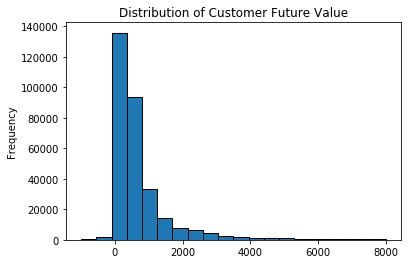

,emailable,solicit_ph_ind,solicit_email_ind,fixd_incm_flg,scheduled_purchase_flg,months_since_last_trans,months_since_first_trans,purch_avg_interval,mail_cnt_36mo,call_in_mo_36mo,...,tier_prev_5-Diamond,tier_prev_xxx,demog_ownrent_trans_DO,demog_ownrent_trans_DR,demog_ownrent_trans_PO,demog_ownrent_trans_PR,P_churn_year_plus1_ind,P_log_margin_Y_pos_1,P_margin_Y_pos_1,CFV
count,311163.000000,311163.000000,311163.000000,311163.000000,311163.000000,311163.000000,311163.000000,311163.000000,311163.000000,311163.000000,...,311163.000000,311163.000000,311163.000000,311163.000000,311163.000000,311163.000000,311163.000000,311163.000000,311163.000000,311163.000000
mean,0.515135,0.892786,0.964324,0.092312,0.259906,2.911413,65.665532,4.912660,19.072133,7.805138,...,0.006203,0.675302,0.938919,0.022487,0.016580,0.022014,0.262860,4.702333,404.823560,816.955042
std,0.499772,0.309386,0.185481,0.289466,0.438583,3.107148,58.174876,10.056728,14.793471,47.719961,...,0.078512,0.468263,0.239478,0.148260,0.127691,0.146730,0.316983,0.009323,2017.808420,3894.483732
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003387,4.664641,-3800.141968,-6473.028371
25%,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,14.000000,1.000000,6.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.016961,4.700046,124.047614,80.081223
50%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,46.000000,1.220000,16.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.093601,4.700671,196.186231,402.935375
75%,1.000000,1.000000,1.000000,0.000000,1.000000,4.000000,110.000000,2.590000,33.000000,3.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.512994,4.702322,387.423065,807.884353
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,290.000000,168.000000,424.000000,2670.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.953835,5.649175,395835.837834,743399.584295


In [5]:
annual_discount_rate = 0.10
combined_df['CFV'] = (combined_df['P_margin_Y_pos_1']*((1-combined_df['P_churn_year_plus1_ind'])**1))/((1+annual_discount_rate)**1) + (combined_df['P_margin_Y_pos_1']*((1-combined_df['P_churn_year_plus1_ind'])**2))/((1+annual_discount_rate)**2) + (combined_df['P_margin_Y_pos_1']*((1-combined_df['P_churn_year_plus1_ind'])**3))/((1+annual_discount_rate)**3)
plothist = combined_df['CFV'].plot.hist(title="Distribution of Customer Future Value",bins=20, range=(-1000,8000),edgecolor='black')
plt.show()
combined_df.describe()

## Establishing the quadrants for high/low churn and margin

In [6]:
print("median predicted churn: ",  np.median(combined_df['P_churn_year_plus1_ind']))
print("median predicted margin: %d" % (np.median(combined_df['P_margin_Y_pos_1'])))

# initializing to values which should not occur after logic below.
combined_df['retention_grp'] = '0X'
combined_df['margin_grp'] = '0X'
combined_df['quadrant_retention_margin'] = 'error_error'

combined_df.loc[combined_df['P_churn_year_plus1_ind']<np.median(combined_df['P_churn_year_plus1_ind']),'retention_grp']="2H"
combined_df.loc[combined_df['P_churn_year_plus1_ind']>=np.median(combined_df['P_churn_year_plus1_ind']),'retention_grp']="1L"

combined_df.loc[(combined_df['P_margin_Y_pos_1']<np.median(combined_df['P_margin_Y_pos_1'])),'margin_grp']="1L"
combined_df.loc[(combined_df['P_margin_Y_pos_1']>=np.median(combined_df['P_margin_Y_pos_1'])),'margin_grp']="2H"

combined_df.loc[(combined_df['retention_grp'] == '1L') & (combined_df['margin_grp'] == '1L'),'quadrant_retention_margin'] = "1L_1L"
combined_df.loc[(combined_df['retention_grp'] == '1L') & (combined_df['margin_grp'] == '2H'),'quadrant_retention_margin'] = "1L_2H"
combined_df.loc[(combined_df['retention_grp'] == '2H') & (combined_df['margin_grp'] == '1L'),'quadrant_retention_margin'] = "2H_1L"
combined_df.loc[(combined_df['retention_grp'] == '2H') & (combined_df['margin_grp'] == '2H'),'quadrant_retention_margin'] = "2H_2H"

median predicted churn:  0.09360082250404038
median predicted margin: 196


## Output scored data and go to Tableau for more analysis...

In [7]:
combined_df.to_csv('C:\\Business Analytics\\3rd Sem\\CLV\\Team Project\\Team Project\\CLV_scores.csv',index=False)